## Normalisasi data

Dalam normalisasi data ini dibantu dengan library sklearn. Sklearn merupakan library yang menyediakan fungsi-fungsi untuk membantu proses normalisasi data.

In [36]:

from sklearn import preprocessing
x_array = [5,0,2,4,2,0,1,0,0,9]
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.43685203 0.         0.17474081 0.34948162 0.17474081 0.
  0.08737041 0.         0.         0.78633365]]


## Discrete Fourier Transform

Library datetime disini berfungsi untuk mengubah data dari format datetime menjadi format yang lebih mudah dibaca dan untuk mencari nilai waktu pengolahan DFT. Library matplotlib disini digunakan untuk menampilkan grafik plot dari hasil dft

In [1]:
from datetime import datetime #importing datetime
import matplotlib.pyplot as plt #importing matplotlib

Hasil dot: (2.00951933+0j)
Hasil coef DFT: 2.00951933
Hasil dot: (0.8069590048018007-0.08772486779534999j)
Hasil coef DFT: 0.8117133039814145
Hasil dot: (0.3367344577933064+0.93365200115749j)
Hasil coef DFT: 0.9925201027338125
Hasil dot: (0.41622667519922935+0.9728837668384176j)
Hasil coef DFT: 1.0581812079814654
Hasil dot: (-0.2493640477921072+0.34736196944605324j)
Hasil coef DFT: 0.42760117650528645
Hasil dot: (-0.2621112100000019+1.3560737346557385e-12j)
Hasil coef DFT: 0.2621112100000019
Hasil dot: (-0.24936404779359694-0.3473619694434533j)
Hasil coef DFT: 0.42760117650404317
Hasil dot: (0.4162266751961719-0.9728837668379047j)
Hasil coef DFT: 1.0581812079797912
Hasil dot: (0.3367344577902822-0.9336520011580864j)
Hasil coef DFT: 0.9925201027333476
Hasil dot: (0.806959004800674+0.08772486779347766j)
Hasil coef DFT: 0.811713303980092
Duration: 0:00:00.002863


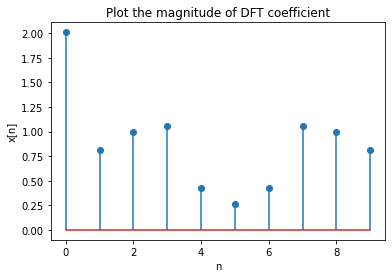

In [4]:
start_time = datetime.now() #memulai waktu
x1 = [0.43685203, 0,         0.17474081, 0.34948162, 0.17474081, 0,
  0.08737041, 0,         0,         0.78633365] #nilai dari sinyal

N = len(x1)
e = 2.718281828459045
pi = 3.14159265359
w = 2*pi/N
W = e**(-1j*w)
arr = []
sum = 0
dot = []
coef_mag = []
hasil = []
hasil_dot = []
panjang = []
Wn =[[0 for x in range (N)] for y in range(N)]
def Mag(A, B):
    return pow((pow(A, 2) + pow(B, 2)), 0.5)

for i in range(N):
    for j in range (N):
        Wn[i][j] = pow(W, i*j)

for i in range(N):
    for j in range(N):
        arr = pow(W, i*j)
        sum = sum + arr * x1[j]
    dot = sum
    coef_mag = Mag(dot.real, dot.imag)
    hasil.append(coef_mag)
    panjang.append(i)
    hasil_dot.append(dot)
    print("Hasil dot: " + str(dot))
    print("Hasil coef DFT: " + str(coef_mag))
    
    sum = 0
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) #menghitung waktu
f = plt.figure()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title("Plot the magnitude of DFT coefficient")
plt.stem(panjang, hasil)  #plotting
plt.show()
f.savefig('DFTb.png')

## Inverse discrete fourier transform

Berikut ini adalah hasil dari inverse discrete fourier transform.

In [5]:
X_inv = []

Wnx = [[0 for x in range(N)] for y in range(N)]
for i in range(N):
   for j in range(N):
       Wnx[j][i] = Wn[i][j].conjugate()


for i in range(N):
    sum = 0
    for j in range(N):
        temp = Wnx[i][j] * hasil_dot[j]
        sum = sum + temp
    X_inv.append(sum.real/N)

print("Hasil IDFT: ", X_inv)



Hasil IDFT:  [0.43685202999957584, -1.1286527268339342e-13, 0.1747408099999764, 0.3494816200000143, 0.17474081000004887, 6.501466032204917e-14, 0.08737041000004792, 2.0872192862952943e-14, -4.758415883543421e-14, 0.7863336499997245]
